### Telcom Churn Analysis


Business Problem
* About: Customer Churn is defined when a customer chooses to stop using the products or services of an organization. Every churn has a direct impact on company operations (revenues, costs, profit, etc.).

* Business Need: Implement a strategy for tracking customer journey, identifying patterns related to churn, predicting who is likely to churn, take pre-emptive actions to prevent future churns.

* Key Business Metrics: % total customer churn per year, % total revenue saved due to churn, % total customer churn per year

Business Problem --> Data Science Problem
Business Case -> Data Science Problem -> Data -> Features -> Model -> Artifacts -> Value

The churn prediction problem is a supervised data science problem. The steps involve - capturing customer attributes with historical labels, deriving new features from the dataset, training machine learning models, and finally validation, explanation, and deployment.



### Dataset Description
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

 the data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

* gender: Whether the client is a female or a male (Female, Male).
* SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
* Partner: Whether the client has a partner or not (Yes, No).
* Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

* customerID :  ID ofcustomer
* tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
* Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
* PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
* MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
* TotalCharges: The total amount charged to the customer (Multiple different numeric values).
* Churn : Whether the customer churned or not (Yes or No)

(3) Services Information

* PhoneService: Whether the client has a phone service or not (Yes, No).
* MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
* InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
* OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
* OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
* DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
* TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
* StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
* StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).



### Question(s) for Analysis
1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

### Steps of the project
The project consists of the following sections:

1. Data Reading
2. Exploratory Data Analysis and Data Cleaning
3. Data Visualization
4. Feature Importance
5. Feature Engineering
6. Setting a baseline
7. Splitting the data in training and testing sets
8. Assessing multiple algorithms
9. Algorithm selected: Gradient Boosting
10. Hyperparameter tuning
11. Performance of the model
12. Drawing conclusions — Summary

### I.Data Preparation:

Useful data attributes in churn problems include - demographics data, customer-company interaction data, transactional details, customer reviews/feedbacks, competitor offerings, and other misc. datasets. Often the data may contain outliers, missing information, and other inconsistencies which can be treated in the preprocessing steps.



In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import normalized_mutual_info_score, mutual_info_scoreStandardScaler

In [2]:
telco_base_data = pd.read_csv('WA_Fn_UseC_Telco_Customer_Churn.csv')


In [3]:
telco_base_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#Check the various attributes of data like shape (rows and cols), Columns, datatypes
telco_base_data.shape 

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# visualize column names
telco_base_data.columns
# check unique values of each column
for column in telco_base_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, telco_base_data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

### (1) Demographic Information

* gender: Whether the client is a female or a male (Female, Male).
* SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
* Partner: Whether the client has a partner or not (Yes, No).
* Dependents: Whether the client has dependents or not (Yes, No).

### (2) Customer Account Information

* tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
* Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
* PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
* MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
* TotalCharges: The total amount charged to the customer (Multiple different numeric values).

### (3) Services Information

* PhoneService: Whether the client has a phone service or not (Yes, No).
* MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
* InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
* OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
* OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
* DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
* TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
* StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
* StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Ye

###  Exploratory Data Analysis and Data Cleaning

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

### Missing values and data types

At the beginning of EDA, we want to know as much information as possible about the data, this is when the pandas.DataFrame.info method comes in handy. This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.

In [7]:

# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [9]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

* 75% customers have tenure less than 55 months

* Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


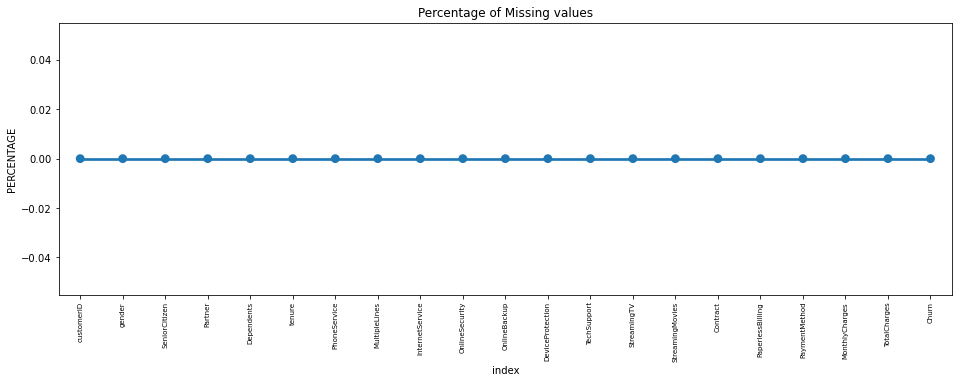

In [10]:
#Percentage of Missing values
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing Data - Initial Intuition
* Here, we don't have any missing data.
General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

   ### A.Cleaning

In [11]:
#Create a copy of base data for manipulation & processing
telco_data = telco_base_data.copy()

In [12]:
# transform the column TotalCharges into a numeric data type
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')


We can now observe that the column TotalCharges has 11 missing values.


In [13]:
# null observations of the TotalCharges column
telco_data[telco_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


These observations have also a tenure of 0, even though MontlyCharges is not null for these entries. This information appeared to be contradictory, and therefore, we decide to remove those observations from the data set.

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [14]:

telco_data.loc[telco_data ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
telco_data.dropna(inplace=True)
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [17]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
telco_data['tenure_group'].value_counts()


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [20]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


### Remove customerID,tenure columns
The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.

In [21]:
#drop column customerID
telco_data.drop(columns= ['customerID'], axis=1, inplace=True)
telco_data.head()
telco_data.drop(columns= ['tenure'], axis=1, inplace=True)
telco_data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Payment method denominations
As shown below, some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [22]:
# unique elements of the PaymentMethod column
telco_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [23]:
# remove (automatic) from payment method names
telco_data['PaymentMethod'] = telco_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)


In [24]:
# unique elements of the PaymentMethod column after the modification 
telco_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

### 3. Data Visualization

In this section, we analyze the data by using visualization.

### a.Plot distibution of individual predictors by churn

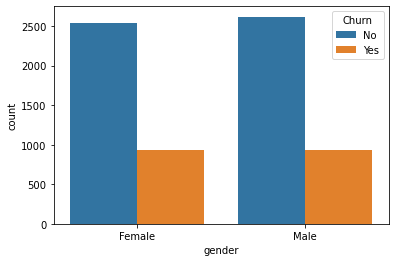

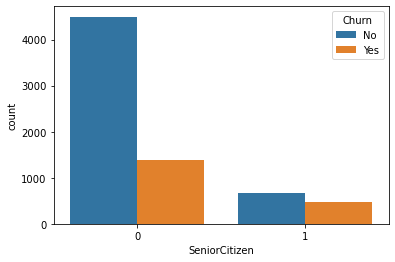

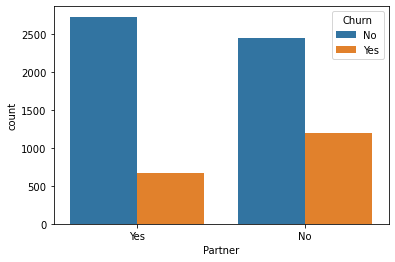

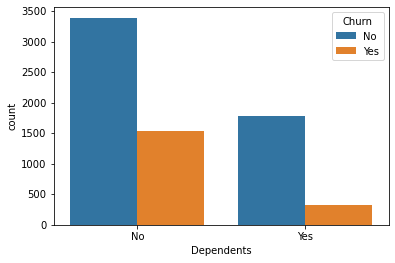

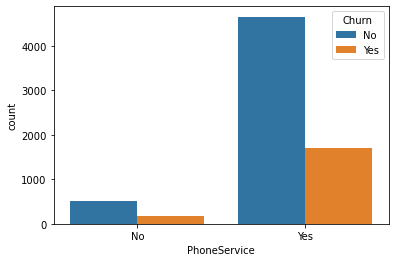

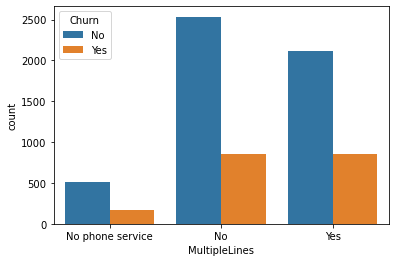

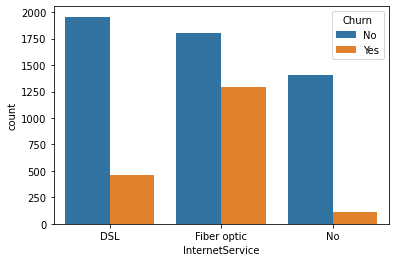

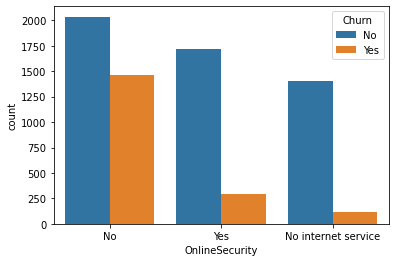

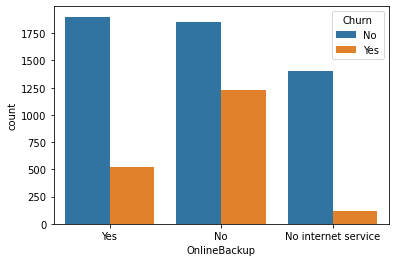

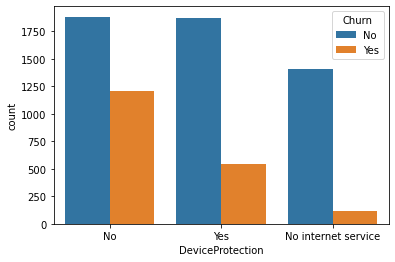

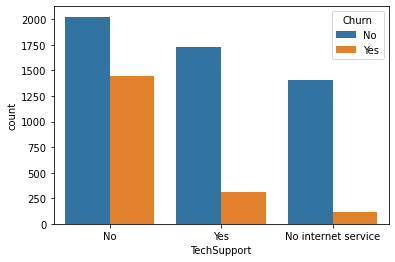

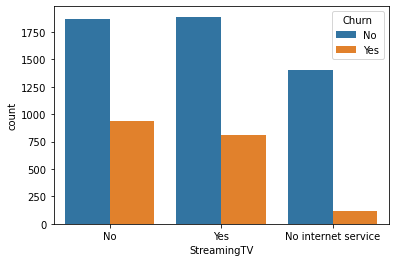

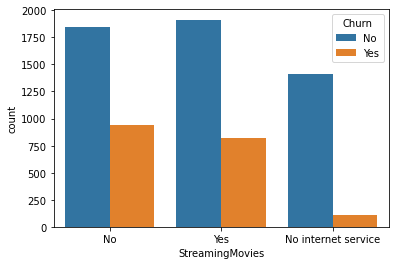

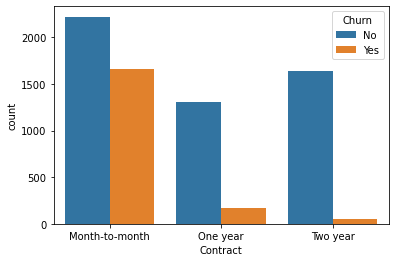

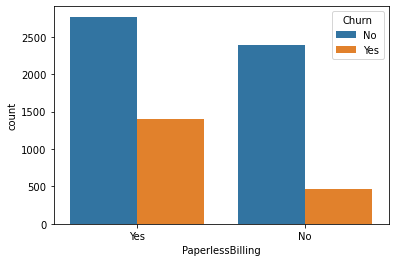

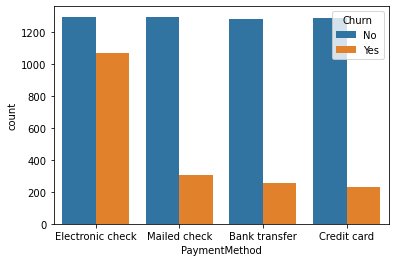

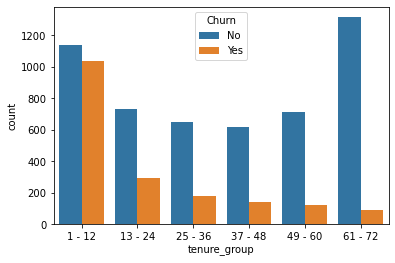

In [25]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

We can extract the following conclusions by evaluating services attributes:

We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
Clients with online security churn less than those without it.
Customers with no tech support tend to churn more often than those with tech support.
By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models

#### b.Relationship between Monthly Charges and Total Charges

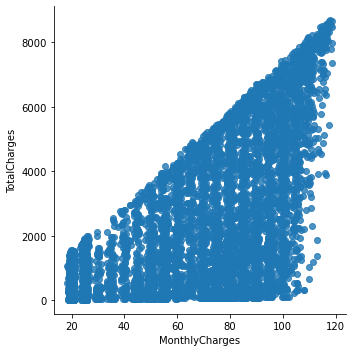

In [26]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


* Total Charges increase as Monthly Charges increase - as expected.


##### Response Variable
The following bar plot shows the percentage of observations that correspond to each class of the response variable: no and yes. As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (73.42%). When modeling, this imbalance will lead to a large number of false negatives, as we will see later.

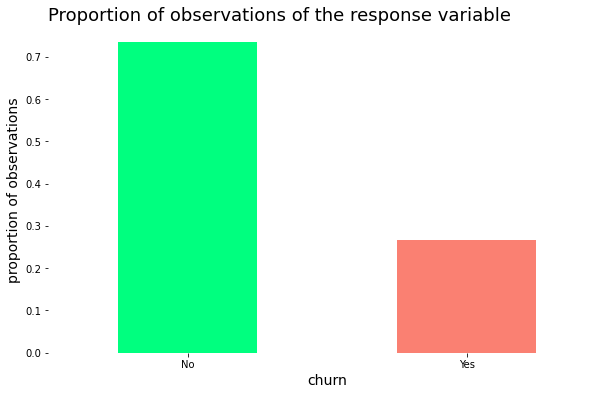

In [27]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = telco_data['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

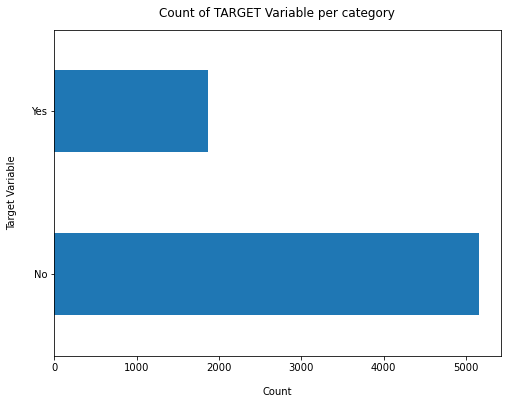

In [28]:
telco_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In this article, we are going to use normalized stacked bar plots to analyze the influence of each independent categorical variable in the outcome.

A normalized stacked bar plot makes each column the same height, so it is not useful for comparing total numbers; however, it is perfect for comparing how the response variable varies across all groups of an independent variable.

On the other hand, we use histograms to evaluate the influence of each independent numeric variable in the outcome. As mentioned before, the data set is imbalanced; therefore, we need to draw a probability density function of each class (density=True) to be able to compare both distributions properly.

#### Demographic Information
The following code creates a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), showing the percentage of Churn for each category of the attribute.

In [29]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(telco_data[column], telco_data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

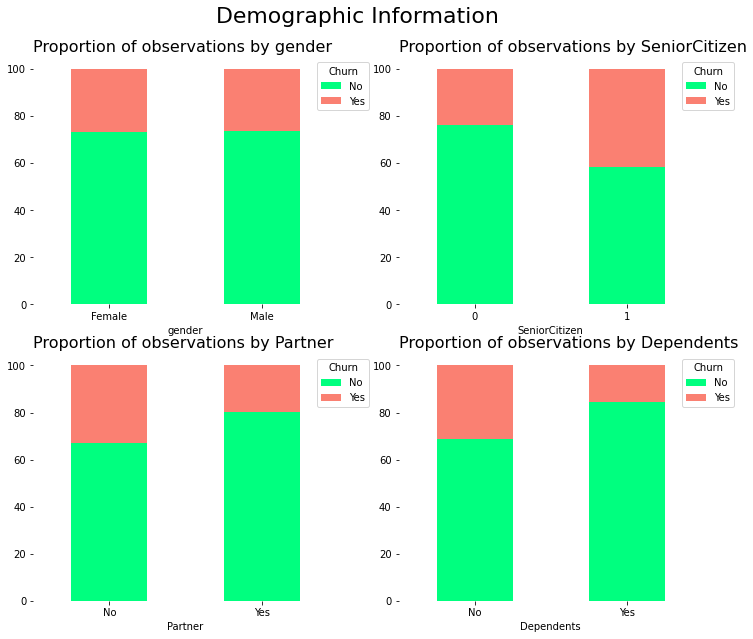

In [30]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).

We can extract the following conclusions by analyzing demographic attributes:

The churn rate of senior citizens is almost double that of young citizens.
We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
Customers with a partner churn less than customers with no partner.

Customer Account Information — Categorical variables
As we did with demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).

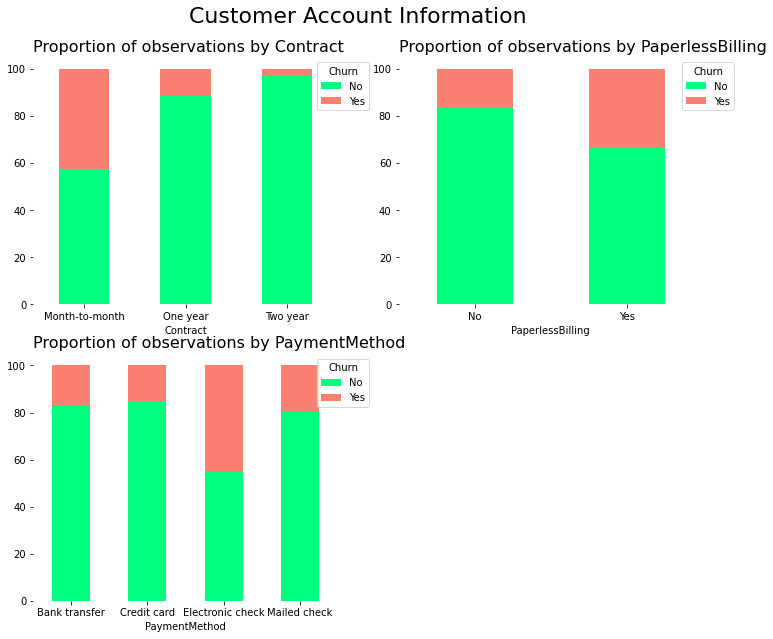

In [31]:
 #customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
Customers who opted for an electronic check as paying method are more likely to leave the company.
Customers subscribed to paperless billing churn more than those who are not subscribed.

#### Customer Account Information — Numerical variables
The following plots show the distribution of tenure, MontlyCharges, TotalCharges by Churn. For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests that all of the attributes will be useful to determine whether or not a customer churns.

In [32]:
#pourcentage
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

* Data is highly imbalanced, ratio = 73:27
* So we analyse the data with other features while taking the target values separately to get some insights.

In [33]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.

            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization

            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(telco_data[column], telco_data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

We can extract the following conclusions by analyzing the histograms above:

The churn rate tends to be larger when monthly charges are high.
New customers (low tenure) are more likely to churn.
Clients with high total charges are less likely to leave the company.

#### Services Information
Lastly, we evaluate the percentage of the target for each category of the services columns with stacked bar plots.

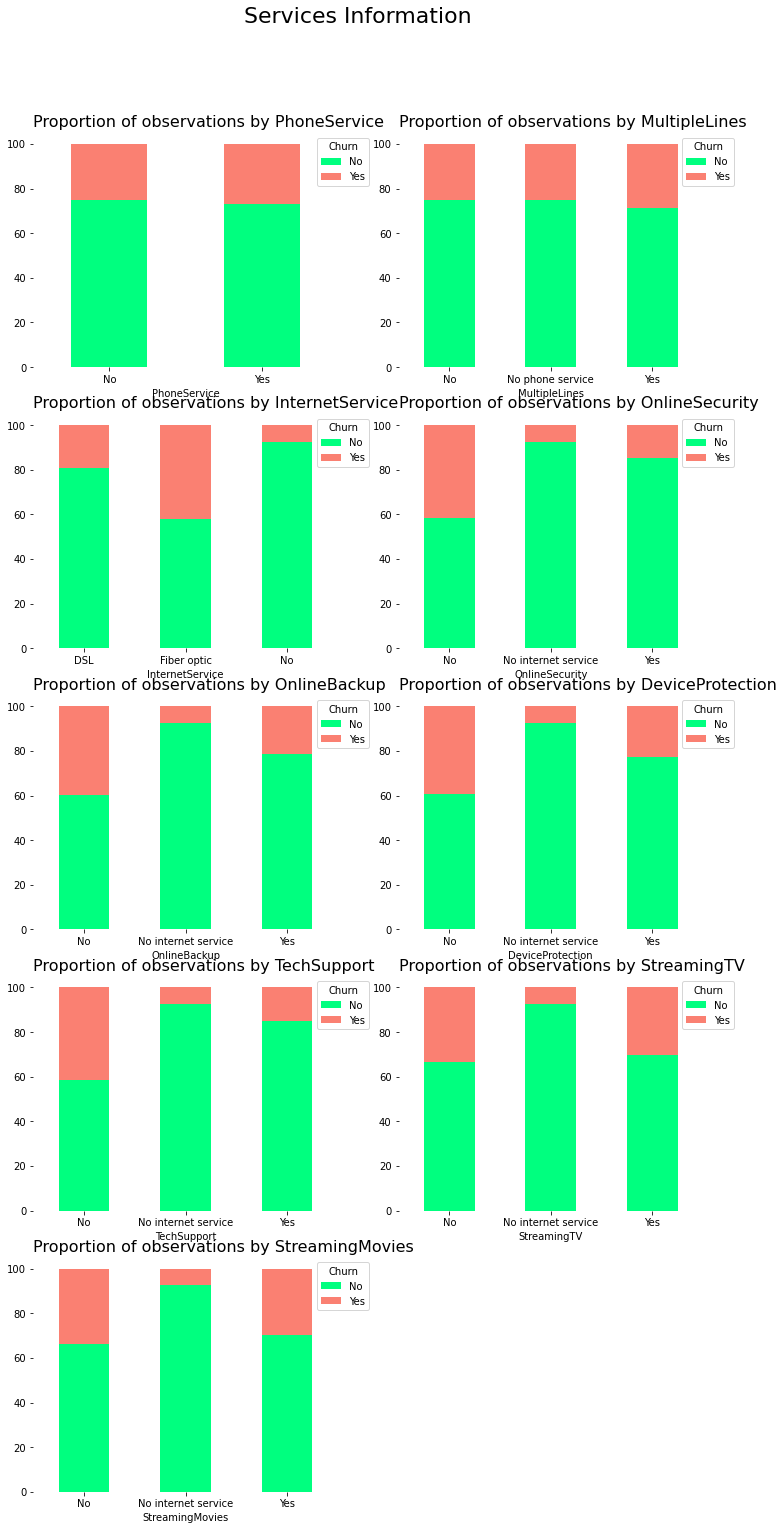

In [34]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')


We can extract the following conclusions by evaluating services attributes:

We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
Clients with online security churn less than those without it.
Customers with no tech support tend to churn more often than those with tech support.
By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

### 4. Feature importance


##### Mutual information — analysis of linear and nonlinear relationships
Mutual information measures the mutual dependency between two variables based on entropy estimations. In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.


The Scikit-Learn library has implemented mutual information in the metrics package. The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

In [35]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, telco_data.Churn)

# select categorial variables excluding the response variable 
categorical_variables = telco_data.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target. As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.



The mutual information extends the notion of correlation to nonlinear relationships since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

### 5. Feature Engineering

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process. The techniques implemented in this project are described in more detail below. All transformations are implemented using only Pandas; however, we also provide an alternative implementation using Scikit-Learn. As you can see, there are multiple ways to solve the same problem

#### No modification
The SeniorCitizen column is already a binary column and should not be modified.

#### Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn .

In [36]:


# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        telco_data[column] = telco_data[column].map({'Female': 1, 'Male': 0})
    else: 
        telco_data[column] = telco_data[column].map({'Yes': 1, 'No': 0}) 


#### One-Hot Encoding
One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data. In this project, we apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV, and (10)StreamingMovies.

In [37]:
# one-hot encoding (categorical variables with more than two levels)
#one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            #'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod','tenure_group']

# encode categorical variables with more than two levels using one-hot encoding
#telco_data = pd.get_dummies(telco_data, columns )
telco_data = pd.get_dummies(telco_data)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0


The main drawback of this encoding is the significant increase in the dimensionality of the dataset (curse of dimensionality); therefore, this method should be avoided when the categorical column has a large number of unique values.

In [38]:
telco_data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,84.80,1990.50,0,0,...,0,0,0,1,0,1,0,0,0,0
7039,1,0,1,1,1,1,103.20,7362.90,0,0,...,0,1,0,0,0,0,0,0,0,1
7040,1,0,1,1,0,1,29.60,346.45,0,0,...,0,0,1,0,1,0,0,0,0,0
7041,0,1,1,0,1,1,74.40,306.60,1,0,...,0,0,0,1,1,0,0,0,0,0


<AxesSubplot:>

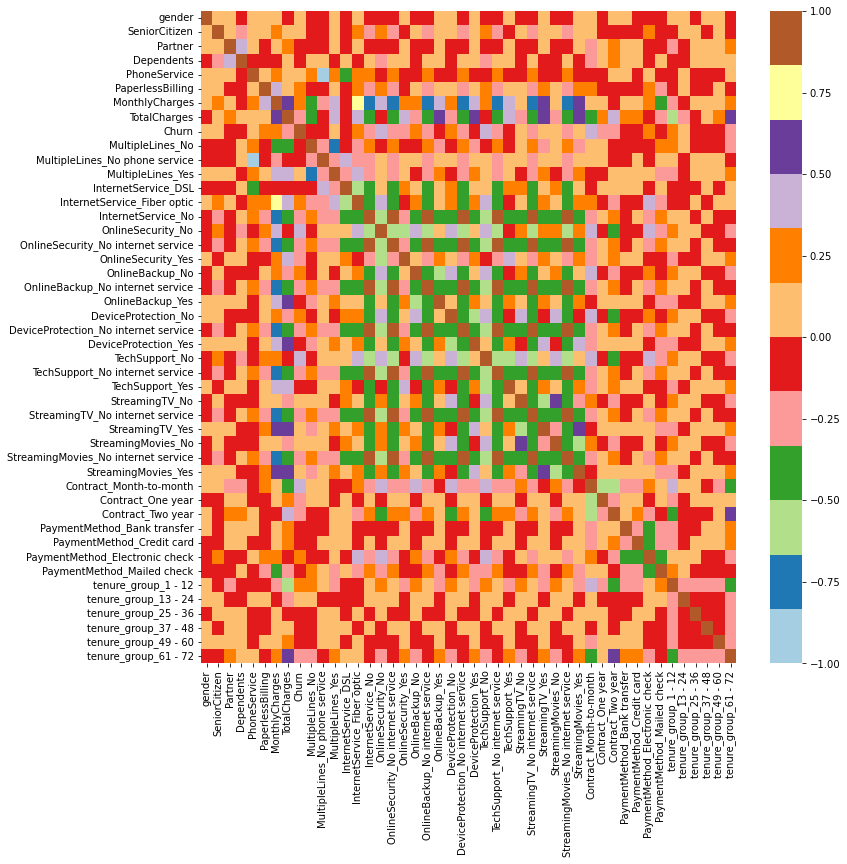

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data.corr(), cmap="Paired")

<AxesSubplot:>

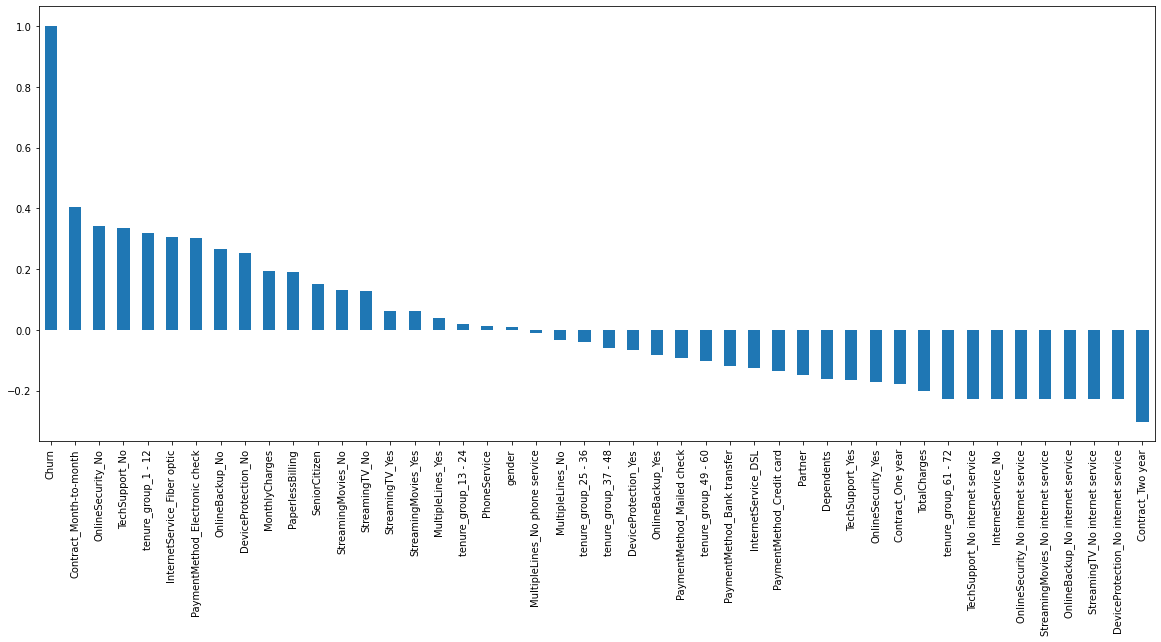

In [40]:
plt.figure(figsize=(20,8))
telco_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, 'Monthly charges by churn')

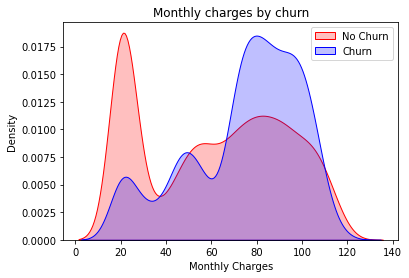

In [41]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high



Text(0.5, 1.0, 'Total charges by churn')

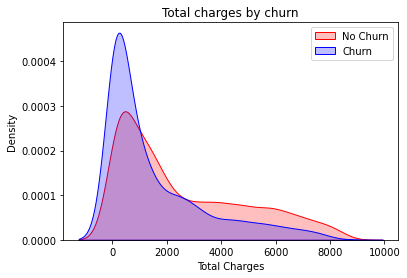

In [42]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

#### Normalization

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process; however, it does not mean those variables are more important to predict the target. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this project, we will use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [43]:
#from sklearn.preprocessing import MinMaxScaler

In [44]:
#import matplotlib
#import matplotlib.pyplot as plt

In [45]:
#def plotDistribGraph(pdf):
    #fig, a = plt.subplots(ncols=1, figsize=(16, 5))
   # a.set_title("Distributions")
    #for col in pdf.columns:
       # sns.kdeplot(pdf[col], ax=a)
    #plt.show
#def plotGraph(pdf, pscaled_df):
   # fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
   # a.set_title("Avant mise à l'echelle")
   # for col in pdf.columns:
        #sns.kdeplot(pdf[col], ax=a)
   # b.set_title("Apres mise à l'echelle")
   # for col in pdf.columns:
      #  sns.kdeplot(pscaled_df[col], ax=b)
   # plt.show()

In [46]:
#scaler = MinMaxScaler()
#keepCols = ['tenure', 'MonthlyCharges', 'TotalCharges']
#scaled_df = scaler.fit_transform(telco_data[keepCols])
#scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
#plotGraph(telco_data[keepCols], scaled_df)

In [47]:
#plotDistribGraph(telco_data[keepCols])

### CONCLUSION

* These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights.

In [48]:
telco_data.to_csv('tel_churn1.csv')


In [49]:
df=pd.read_csv("tel_churn1.csv")
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,1,0,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,0,0,0,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,0,0,0,0,0,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,4,1,0,0,0,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,0,1,1,1,1,84.80,1990.50,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,1,0,1,1,1,1,103.20,7362.90,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,1,0,1,1,0,1,29.60,346.45,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,0,1,1,0,1,1,74.40,306.60,1,...,0,0,0,1,1,0,0,0,0,0


In [50]:
df=df.drop('Unnamed: 0',axis=1)

In [51]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,1,1,84.80,1990.50,0,0,...,0,0,0,1,0,1,0,0,0,0
7028,1,0,1,1,1,1,103.20,7362.90,0,0,...,0,1,0,0,0,0,0,0,0,1
7029,1,0,1,1,0,1,29.60,346.45,0,0,...,0,0,1,0,1,0,0,0,0,0
7030,0,1,1,0,1,1,74.40,306.60,1,0,...,0,0,0,1,1,0,0,0,0,0
